# Libraries

In [385]:
import pickle
import numpy as np
import json
import random
import pandas as pd

import nltk
import random
import string
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud,STOPWORDS
import missingno as msno
from sklearn.feature_extraction.text import CountVectorizer

from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import keras_tuner
import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

from keras.regularizers import l2



In [ ]:
pip install --upgrade keras
pip install tensorflow
pip install inflect
pip install autocorrect
pip install scikit-learn
pip install keras-tuner --upgrade
pip install seaborn
pip install wordcloud
pip install missingno

In [142]:
pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Functions


In [386]:
import nltk
import re
import inflect
import string


from nltk.corpus import stopwords
from nltk.corpus import wordnet
from itertools import product
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller

#download stop words
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('popular')

#create instance of lemma
lemmatizer = WordNetLemmatizer()

#create instance of spell correction 
spell = Speller(lang='en')

#initialize engine
inflect_engine = inflect.engine()


#list of possible contractions to fix any grammar and provide best answer
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

#create contraction list separate by pipe
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Add all punctuation characters
ignore_words=[]
ignore_words.extend(string.punctuation)
# Remove duplicates by converting to a set and back to a list
ignore_words = list(set(ignore_words))

#tokenize words
def tokenize_wrods(sentence):
     # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)

    return sentence_words

#correct spelling 
def correct_spelling(words_list):

    #correct each word, iterate and use the autocorrect to return appropiate word
    corrected_list = [spell(word) for word in words_list]

    return corrected_list


#correct contractions to original form ex I'm -> I am
def expand_contractions(sentence, contractions_dict=contractions_dict):
    def replace(match):
        #find  if any contraction exist 
        return contractions_dict[match.group(0)]
    #remove replace contraction for original form
    return contractions_re.sub(replace, sentence)

#remove stop words 
def remove_stop_words(words_list):
    #get the English stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords iterate if word is not in the stopword then I added to list
    corrected_list = [word for word in words_list if word not in stop_words]
    corrected_list = [word for word in words_list if word not in ignore_words]

    return corrected_list

#get word tags noun,verb,adverb, adjetive 
def get_wordnet_pos(word):
    
    #identify the tag that correspond
    tag = nltk.pos_tag([word])[0][1][0].upper()
   
    #create a tag dict
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    
    #return type of word noun,verb,adverb, adjetive 
    return tag_dict.get(tag, wordnet.NOUN)

def generate_variations(sentence_words):
    
    all_variations=[]
    for word in sentence_words:
        #lemma word by type 
        lemmatized_word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
        #add to a variations, example if the sentences is I'm starving 
        #will be added [starve,starving]
        word_variations = set([word, lemmatized_word] )
        
        # Add singular and plural forms if the word is a noun, if is a noun
        #to increase our matching chances ex. people, person etc
        if get_wordnet_pos(word) == wordnet.NOUN:
            #add singular and plural of origninal word
            # word_variations.add(inflect_engine.singular_noun(word) or word)
            # word_variations.add(inflect_engine.plural_noun(word) or word)
            #add s and p of lemma 
            word_variations.add(inflect_engine.singular_noun(lemmatized_word) or lemmatized_word)
            word_variations.add(inflect_engine.plural_noun(lemmatized_word) or lemmatized_word)
        
        #for initial stage we will add everything to the senctence
        #like it was part of it ex. [starve, starving]
        for variation in word_variations:
            all_variations.append(variation)

    #return all the sentence_word + variations 
    return all_variations


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raemilcorniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/raemilcorniel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/raemilcorniel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/raemilcorniel/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/raemilcorniel/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/raemilcorniel/nltk_data...
[nltk_data]    |   Package ga

In [387]:

#load file and return file loaded 
def readJSON(filename):
    with open(filename) as f:
        file = json.load(f)
    return file


#create a empty data frame to load or data.json
def createDF():
    df = pd.DataFrame({
        'Pattern' : [],
        'Tag' : []
    })
    
    return df

#convert json file int o df, all the data from json file is inserted into the new df
def fromJSONToDF(json_file, df):
    
    for intent in json_file['intents']:
        
        for pattern in intent['patterns']:
            
            sentence_tag = [pattern, intent['tag']]
            df.loc[len(df.index)] = sentence_tag
                
    return df

#get corpus, get list of words
def getCorpus(series):
    words = []
    for text in series:
        for word in text.split():
            words.append(word.strip())
    return words

# once the predictions are ready, we have coupled all the metrics together, so it can be futher utilize and added 
# in a df
def computeMetrics(pred):

    #get labels from predciton
    labels = pred.label_ids
    #get each pred
    predictions = pred.predictions.argmax(-1)
    #using sklearn.metrics set of metrics
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='macro')
    acc = accuracy_score(labels, predictions)
    
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

# #PyTorch class used to represent a dataset. This custom data loader class is designed to handle tokenized data and corresponding labels, making it easy to feed data into a PyTorch model for training or inference.
# class DataLoader(Dataset):
    
#     def __init__(self, encodings, labels):
        
#         self.encodings = encodings
#         self.labels = labels

#     def __getitem__(self, idx):
               
#         item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
#         item['labels'] = torch.tensor(self.labels[idx])
#         return item

#     def __len__(self):

#         return len(self.labels)

# Load Data

In [388]:
#todo: modify stop_words
data_file = open('data.json').read()
intents = json.loads(data_file)


# EDA

In [261]:
#create a df that will be used for the EDA 
df = createDF()
df

,Pattern,Tag


In [262]:
#fill out the df with the JSON file
df = fromJSONToDF(intents, df)
df.head()

,Pattern,Tag
0,Hi there,Other
1,How are you,Other
2,Is anyone there?,Other
3,Hello,Other
4,Good day,Other


In [263]:
#make a copy of the data that will be used for the preprocesing, this is in case during the EDA, we change the df
mentalHealthDF = df.copy()
mentalHealthDF.head()

,Pattern,Tag
0,Hi there,Other
1,How are you,Other
2,Is anyone there?,Other
3,Hello,Other
4,Good day,Other


In [264]:
#dimenssion of the dataset 
df.shape

(514, 2)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, 0 to 513
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pattern  514 non-null    object
 1   Tag      514 non-null    object
dtypes: object(2)
memory usage: 12.0+ KB


In [266]:
print(f"Amount of classes or tags = {len(df['Tag'].unique())} ")
    

Amount of classes or tags = 8 


In [267]:
df['Tag'].value_counts()

Tag
Anxiety          169
Other             92
Depression        82
phobia            81
ptsd              47
schizophrenia     32
Dpression          8
Otherr             3
Name: count, dtype: int64

/var/folders/3c/4jp44td56g5bg52_nbjdy4gh0000gn/T/ipykernel_16456/1668159052.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Tag', data=df_top, palette='Greens', order = top_tags, hue=None)


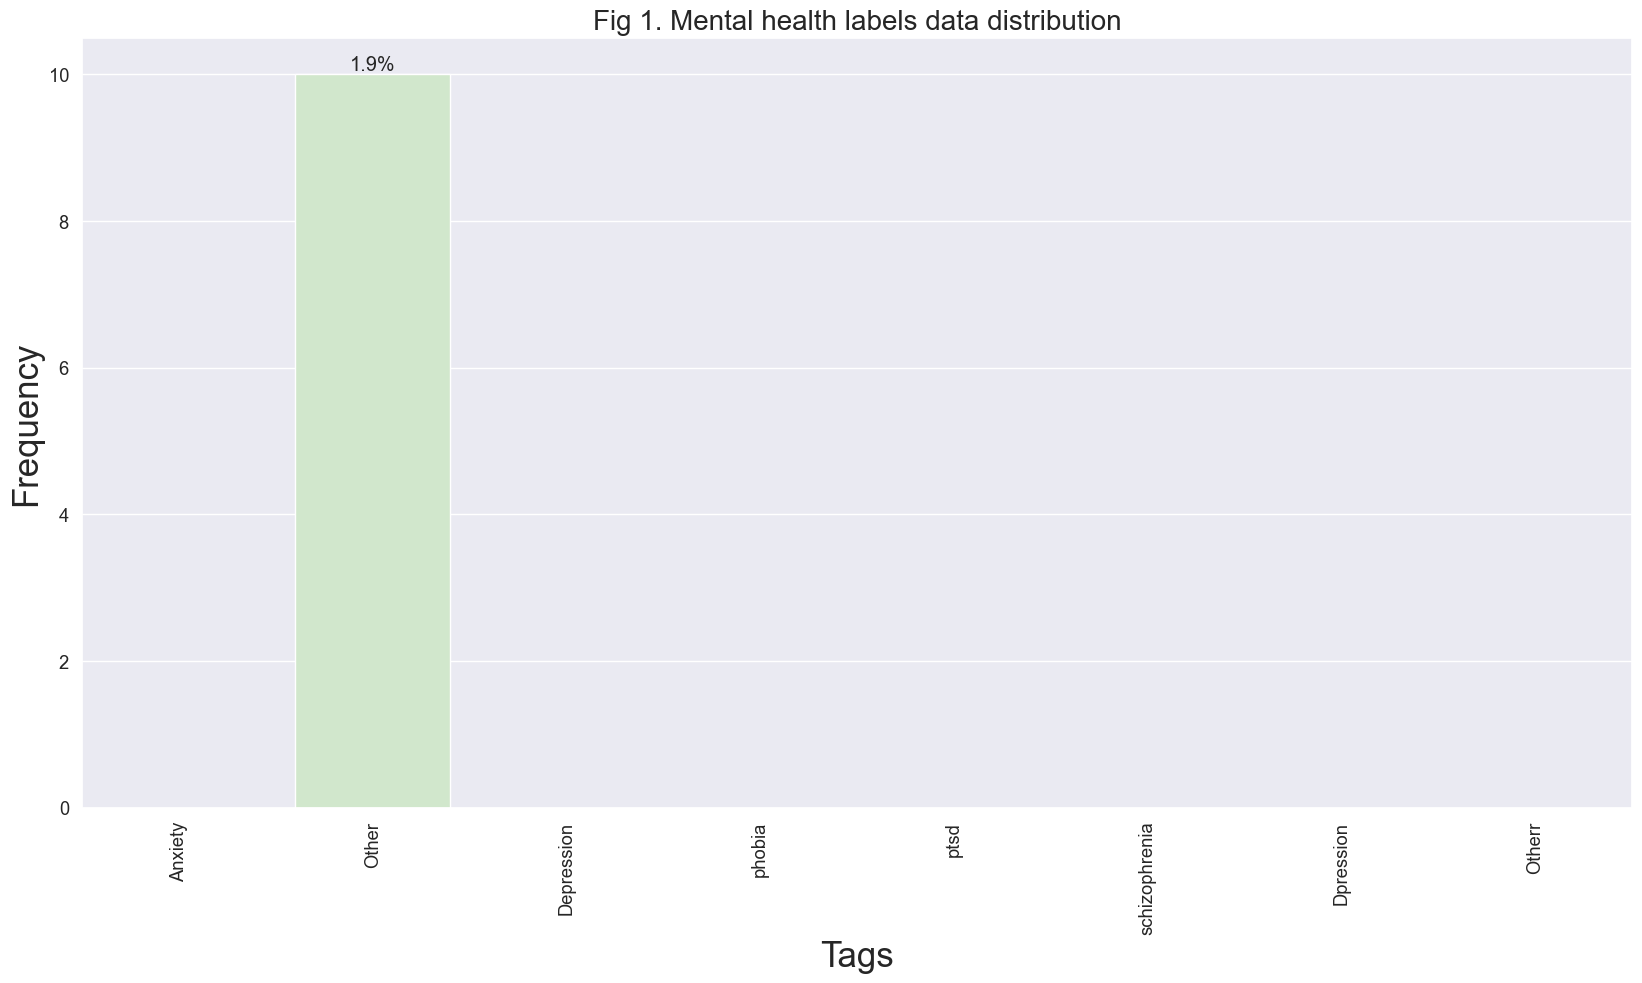

In [268]:
#create a distribution of our tag or labels

#get list of tags - only show top 10 tags
top_tags = df['Tag'].value_counts().index[:10]


# Filter the DataFrame to include rows with top 10 tags
df_top = df[df['Tag'].isin(top_tags)].head(10)


#size of font
sns.set(font_scale = 1.2)

#size of the figure 
plt.figure(figsize=(20,10))
#use sns countplot to show the top 10 tags 
ax = sns.countplot(x='Tag', data=df_top, palette='Greens', order = top_tags, hue=None)
#add title 
plt.title("Fig 1. Mental health labels data distribution", fontsize=20)
#add tick rotation for readability 
plt.xticks(rotation = 'vertical')
#add x and y labels 
plt.xlabel('Tags', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
ax.yaxis.set_label_position('left')

#add percentage to each bar
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

#show graph 
plt.show()




In [269]:
df.isnull().sum()
#show null values 
    

Pattern    0
Tag        0
dtype: int64

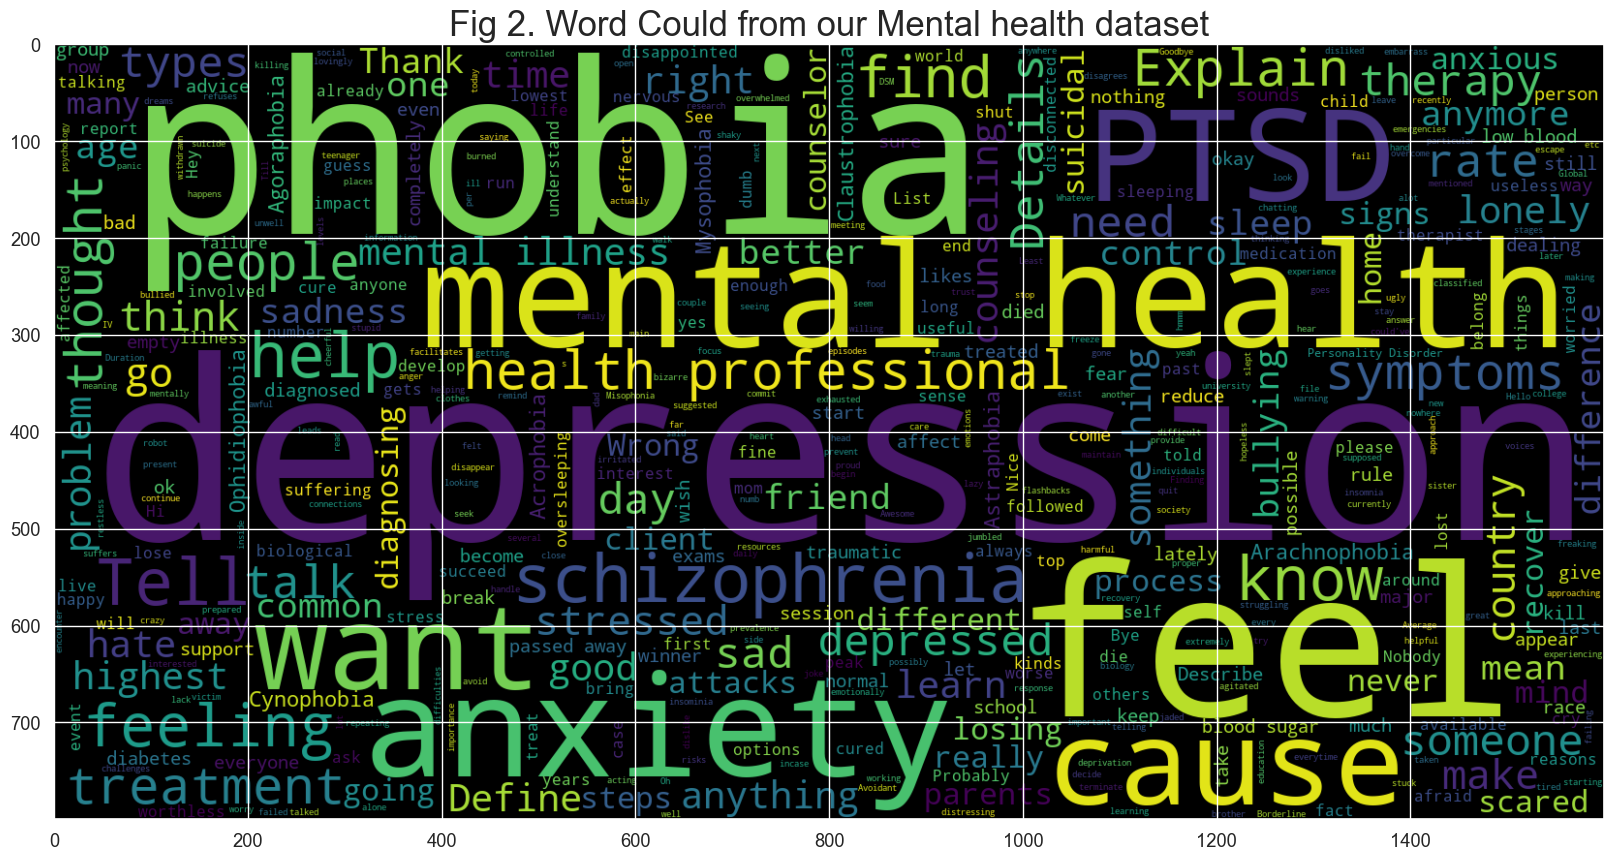

In [270]:
#word cloud with our most repeated words

#define figure size 
plt.figure(figsize=(20, 20)) 
#define a word cloud with max 2000 words and without stopwords (from same wordcloud)
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df['Pattern']))
#show image
plt.imshow(wc, interpolation='bilinear')
#add title 
plt.title("Fig 2. Word Could from our Mental health dataset", fontsize=25)

plt.show()

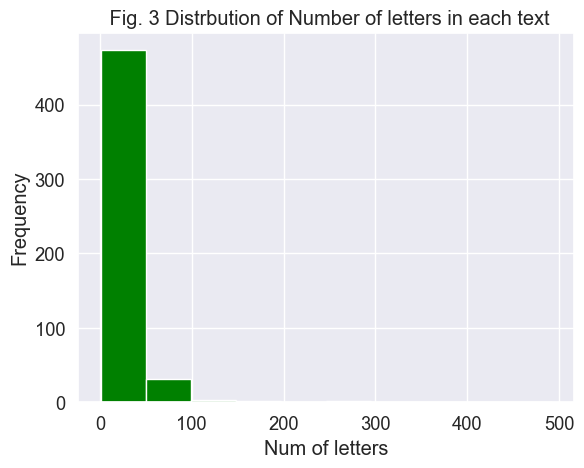

In [271]:
#lenght of letter in each word
letters_len=df['Pattern'].str.len()
#show histogram with letters lenght and color
plt.hist(letters_len,color='green')
#add title
plt.title(" Fig. 3 Distrbution of Number of letters in each text")
#add x and y label
plt.xlabel("Num of letters")
plt.ylabel("Frequency")
#show image 
plt.show()

#amount of letters we will find in each text 

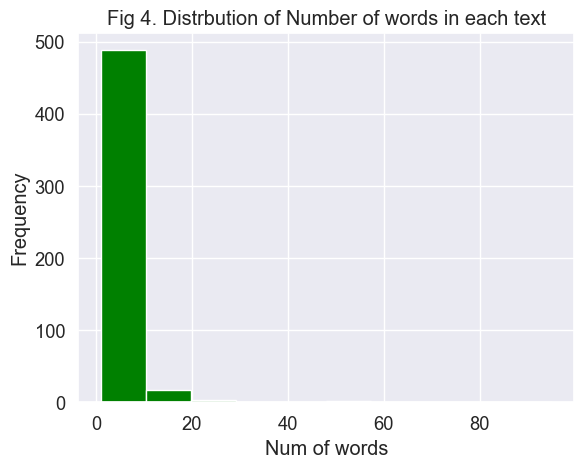

In [272]:
#get the lenght of each word in patterns 
words_len=df['Pattern'].str.split().map(lambda x: len(x))
#show histogram
plt.hist(words_len,color='green')
#add title
plt.title("Fig 4. Distrbution of Number of words in each text")
#add x , y label 
plt.xlabel("Num of words")
plt.ylabel("Frequency")
#show image 
plt.show()

/var/folders/3c/4jp44td56g5bg52_nbjdy4gh0000gn/T/ipykernel_16456/278792084.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word,color='green')


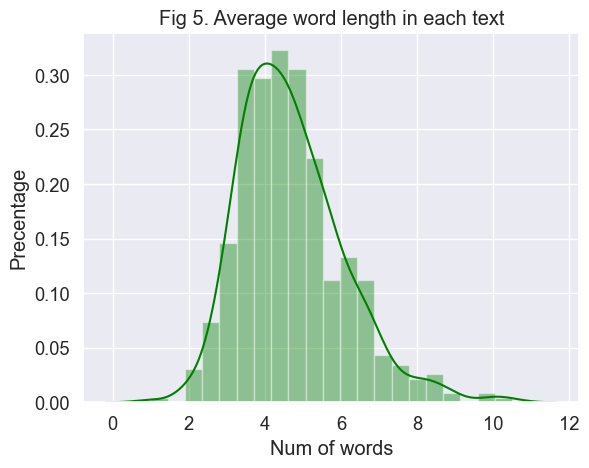

In [273]:
#show a distribution of the lenght of the word of each word 
word=df['Pattern'].str.split().apply(lambda x : [len(i) for i in x])
#get the mean of each word 
word = word.map(lambda x: np.mean(x))
#show a distribution fig
sns.distplot(word,color='green')
#add title
plt.title("Fig 5. Average word length in each text")
#add x, y label 
plt.xlabel("Num of words")
plt.ylabel("Precentage")
#show image 
plt.show()

In [274]:
#get words frequency by creating an ngram
def getTopTextNGRAMS(corpus, n,g):
    #count vectorize corpus -> pattern
    vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
    #get a bag of words 
    bag_of_words = vec.transform(corpus)
    #get a sum of all the words 
    sum_words = bag_of_words.sum(axis=0) 
    #iterate and get the word frequency 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    #order words by frequency relevance 
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



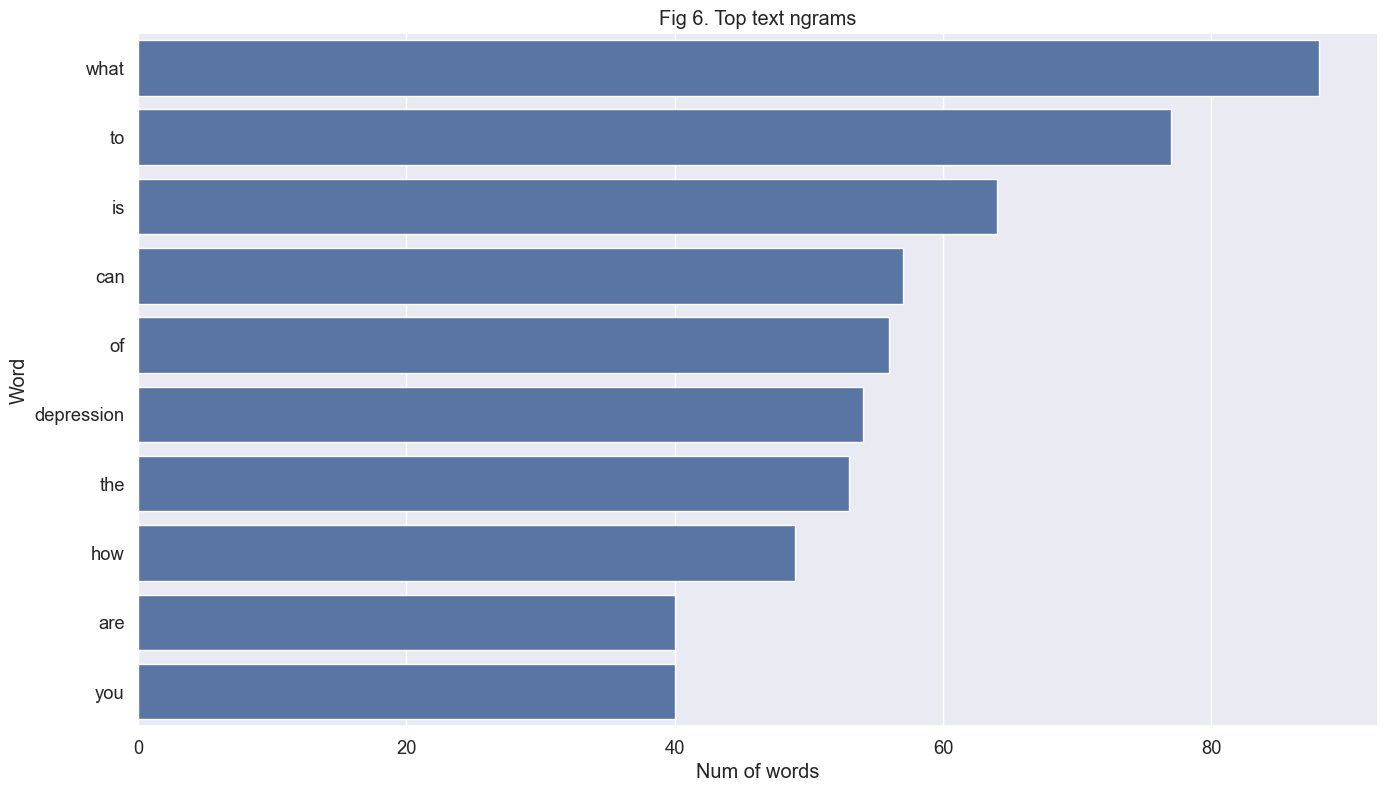

In [275]:
#figure size 
plt.figure(figsize = (16,9))
#get ngram
most_common_uni = getTopTextNGRAMS(df.Pattern,10,1)
#create a dict from ngram 
most_common_uni = dict(most_common_uni)
#create a barplot with the results 
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()));
#show title
plt.title("Fig 6. Top text ngrams")
#show x,y labels 
plt.xlabel("Num of words")
plt.ylabel("Word")
plt.show()

In [276]:
#get list of words from dataframe
corpus = getCorpus(df.Pattern)
#show top five words 
corpus[:5]

['Hi', 'there', 'How', 'are', 'you']

In [277]:
#total words in our dataset 
print(f"dataset contains {len(corpus)} words")

dataset contains 2984 words


In [278]:
#most repeated words
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

#as we see most words are stop words that willbe handle shortly

{'I': 209,
 'What': 79,
 'to': 76,
 'a': 61,
 'of': 56,
 'the': 51,
 'is': 49,
 'How': 47,
 'about': 38,
 'for': 37}

# Preprocessing 

In [389]:
lemmatizer = WordNetLemmatizer()

words=[]
classes = []
documents = []


In [390]:
len(intent['patterns'])

4

In [391]:

for intent in intents['intents']:
    for pattern in intent['patterns']:

        #lower case 
        pattern = pattern.lower()

        #remove contractions 
        pattern = expand_contractions(pattern)

        #tokenize each word
        #w list of tokens
        w = nltk.word_tokenize(pattern)

        #correct any sentence spelling mistake
        w = correct_spelling(w)

        #remove stop words 
        w = remove_stop_words(w)

        # lemmatize and add similar words
        w = generate_variations(w)

        #add word to list of words 
        words.extend(w)

        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])


In [392]:
# lemmaztize and lower each word and remove duplicates
print('after token ',words[:100])

after token  ['hi', 'his', 'there', 'hows', 'how', 'are', 'be', 'you', 'be', 'is', 'anyones', 'anyone', 'there', 'helloes', 'hello', 'good', 'days', 'day', 'hi', 'his', 'heys', 'hey', 'heys', 'hey', 'there', 'byes', 'bye', 'see', 'you', 'later', 'goodbyes', 'goodbye', 'nice', 'chat', 'chatting', 'toes', 'to', 'you', 'byes', 'bye', 'tills', 'till', 'next', 'times', 'time', 'thankss', 'thanks', 'thank', 'thanks', 'thank', 'you', 'that', 'thats', 'be', 'is', 'helpful', 'helpfuls', 'awesome', 'awesomes', 'thankss', 'thanks', 'thank', 'thankss', 'thanks', 'thank', 'fors', 'for', 'helping', 'help', 'me', 'us', 'i', 'we', 'feels', 'feel', 'down', 'i', 'we', 'am', 'be', 'feeling', 'feel', 'hopeles', 'hopelesses', 'hopeless', 'i', 'we', 'have', 'depression', 'depressions', 'i', 'we', 'am', 'be', 'sads', 'sad', 'alls', 'all', 'thes', 'the']


In [393]:
words = sorted(list(set(words)))
words[:10]

['3',
 '3S',
 '99',
 '99S',
 'I',
 'a',
 'about',
 'abouts',
 'acrophobia',
 'acrophobias']

In [394]:
classes = sorted(list(set(classes)))
classes

['Anxiety',
 'Depression',
 'Dpression',
 'Other',
 'Otherr',
 'phobia',
 'ptsd',
 'schizophrenia']

In [395]:

print (documents[:2], "documents list ")


[(['hi', 'his', 'there'], 'Other'), (['hows', 'how', 'are', 'be', 'you'], 'Other')] documents list 


In [396]:
# documents = combination between patterns and intents
print (len(documents), "documents")

514 documents


In [397]:
# classes = intents
print (len(classes), "classes", classes)

8 classes ['Anxiety', 'Depression', 'Dpression', 'Other', 'Otherr', 'phobia', 'ptsd', 'schizophrenia']


In [398]:

# words = all words, vocabulary
print (len(words), "unique lemmatized words", words[:10])


951 unique lemmatized words ['3', '3S', '99', '99S', 'I', 'a', 'about', 'abouts', 'acrophobia', 'acrophobias']


In [399]:

pickle.dump(words,open('texts.pkl','wb'))
pickle.dump(classes,open('labels.pkl','wb'))


In [400]:

# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)



In [401]:

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
# shuffle our features and turn into np.array

random.shuffle(training)
training = np.array(training, dtype=object)

In [402]:

# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


In [403]:
len(train_x)

514

In [404]:
len(train_y)

514

In [405]:
#train split text with random_state =123
X_train,X_test,y_train,y_test = train_test_split(train_x,train_y,random_state = 123)

In [406]:
print(f'X_train dimenssions    {len(X_train)}')
print(f'X_test dimenssions    {len(X_test)}')
print(f'y_train dimenssions    {len(y_train)}')
print(f'y_test dimenssions    {len(y_test)}')

X_train dimenssions    385
X_test dimenssions    129
y_train dimenssions    385
y_test dimenssions    129


In [407]:

# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(X_train[0]),), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(len(y_train[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(learning_rate=0.01, weight_decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy','AUC'])



#fitting and saving the model 
hist = model.fit(np.array(X_train), np.array(y_train), epochs=200, batch_size=5, verbose=1)
#model.save('model_limited_tags.h5', hist)



Epoch 1/200


/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - AUC: 0.6873 - accuracy: 0.3093 - loss: 4.8922   
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - AUC: 0.8146 - accuracy: 0.4252 - loss: 3.8223
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - AUC: 0.8710 - accuracy: 0.5445 - loss: 3.0560
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - AUC: 0.9096 - accuracy: 0.6275 - loss: 2.4885
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - AUC: 0.9366 - accuracy: 0.6380 - loss: 2.0582
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - AUC: 0.9564 - accuracy: 0.7314 - loss: 1.7175
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - AUC: 0.9618 - accuracy: 0.8121 - loss: 1.5126
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - AUC: 0.9626 - accuracy: 0.7686 - loss: 1.4249
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - AUC: 0.9658 - accuracy: 0.7632 - loss: 1.3437
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - AUC: 0.9644 - accuracy: 0.7933 - loss: 1.279

In [366]:
# Load the trained model
#model = load_model('model_limited_tags.h5')


In [408]:

# Get  predictions
y_pred = model.predict(np.array(X_test))

#get my pred and actual for metrics 
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [409]:
# Calculate metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy * 100}')
print(f'Precision: {precision * 100}')
print(f'Recall: {recall * 100}')
print(f'F1 Score: {f1 * 100}')

Accuracy: 79.84496124031007
Precision: 78.94716824949384
Recall: 79.84496124031007
F1 Score: 78.36523974474872


/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [410]:
# Get  predictions on train
y_pred_train = model.predict(np.array(X_train))

#get my pred and actual for metrics 
y_pred_classes_train = np.argmax(y_pred_train, axis=1)
y_true_classes_train = np.argmax(y_train, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step


In [411]:
len(y_pred_classes_train)

385

In [412]:
len(y_true_classes_train)

385

In [413]:
# Calculate metrics
accuracy = accuracy_score(y_true_classes_train, y_pred_classes_train)
precision = precision_score(y_true_classes_train, y_pred_classes_train, average='weighted')
recall = recall_score(y_true_classes_train, y_pred_classes_train, average='weighted')
f1 = f1_score(y_true_classes_train, y_pred_classes_train, average='weighted')

print(f'Accuracy: {accuracy * 100}')
print(f'Precision: {precision * 100}')
print(f'Recall: {recall * 100}')
print(f'F1 Score: {f1 * 100}')

Accuracy: 92.20779220779221
Precision: 92.85867320734148
Recall: 92.20779220779221
F1 Score: 92.07064431025178


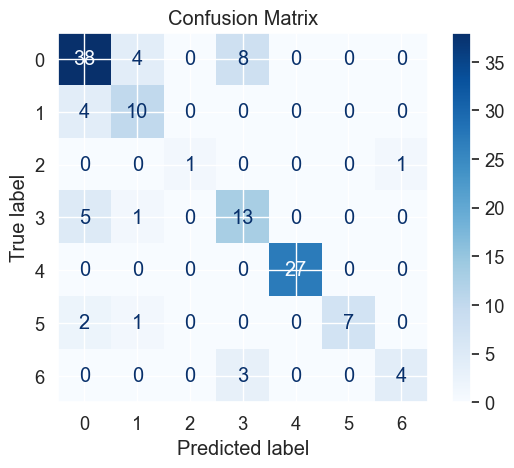

In [339]:

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


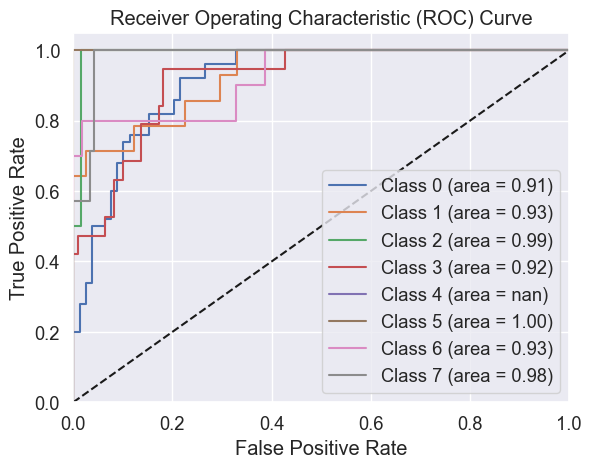

In [340]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Ensure y_test and y_pred are numpy arrays
y_test_roc = np.array(y_test)
y_pred_roc = np.array(y_pred)


# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(y_test_roc[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_pred_roc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(len(y_test_roc[0])):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# hyperparameter tunning 

In [250]:
#https://keras.io/keras_tuner/
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(hp.Choice('units', [8, 16, 32]),activation='relu'))
    model.add(keras.layers.Dense(1, activation='relu'))
    model.compile(loss='mse')
    return model


In [251]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

Reloading Tuner from ./untitled_project/tuner0.json


In [252]:
tuner.search(np.array(X_train), np.array(y_train), epochs=5, validation_data=(np.array(X_test), np.array(y_test)))


In [253]:
type(np.array(X_train))

numpy.ndarray

In [254]:
best_model = tuner.get_best_models()[0]

/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [255]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        32,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,129 (125.50 KB)

 Trainable params: 32,129 (125.50 KB)

 Non-trainable params: 0 (0.00 B)

In [256]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 2 summary
Hyperparameters:
units: 32
Score: 0.1118912473320961
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(5)
# Build the model with the best hp.
model = build_model(best_hps[0])
# Fit with the entire dataset.
x_all = np.concatenate((x_train, x_val))
y_all = np.concatenate((y_train, y_val))
model.fit(x=x_all, y=y_all, epochs=1)

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(len(X_train[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y_train[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(learning_rate=0.01, weight_decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy','AUC'])
model.optimizer()


#fitting and saving the model 
hist = model.fit(np.array(X_train), np.array(y_train), epochs=200, batch_size=5, verbose=1)
model.save('model.h5', hist)

In [ ]:



#load model
model = load_model('model.h5')

#load data and model files
intents = json.loads(open('data.json').read())
words = pickle.load(open('texts.pkl','rb'))
classes = pickle.load(open('labels.pkl','rb'))



def clean_up_sentence(sentence):

    #lower all words 
    sentence = sentence.lower()

    #remove contractions 
    sentence = util.expand_contractions(sentence)
    print('contractions',sentence)

    #tokenize words
    sentence_words =util.tokenize_wrods(sentence)
    print('tokens',sentence_words)

    #correct any sentence spelling mistake
    sentence_words = util.correct_spelling(sentence_words)
    print('correct',sentence_words)

    #remove stop words 
    sentence_words = util.remove_stop_words(sentence_words)
    print('stop words',sentence_words)

    # lemmatize and add similar words
    sentence_words = util.generate_variations(sentence_words)
    print('generate_variations',sentence_words)

    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence

def bow(sentence_words, words, show_details=True):
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

def predict_class(sentence, model):

    # 1. tokenize ,
    # 2. correct any spelling and grammar, 
    # 3. lemmatize,
    sentence_clean = clean_up_sentence(sentence)
    print("sentence_clean",sentence_clean)

    # 4.bag of words, once the msg is clean feed the bow with the sentence_clean
    bag_of_words = bow(sentence_clean, words,show_details=False)
    print("bag_of_words",bag_of_words)

    # 5. convert to array 
    # 6. feed the model 
    model_prediction_result = model.predict(np.array([bag_of_words]))[0]

    # filter out predictions below a threshold
    ERROR_THRESHOLD = 0.25
    threshold_results = [[i,r] for i,r in enumerate(model_prediction_result) if r>ERROR_THRESHOLD]
    
    # 7. return list of intents and probability related to the msg
    # sort by strength of probability
    threshold_results.sort(key=lambda x: x[1], reverse=True)

    #create a empty list to save results 
    return_list = []

    #insert each result in the list 
    for r in threshold_results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})

    return return_list

def getResponse(ints, intents_json):
    #extrat the intent, that is related to a specific tag [{'intent': 'greeting', 'probability': '0.99934894'}]
    tag = ints[0]['intent']

    #load data.json file into list_of_intents
    list_of_intents = intents_json['intents']

    #search in the data.json for the specific tag and pick a random response
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

def updateJsonWithProbability(question, answer, probability):
    # read Json File
    with open('probabiltiy.json', 'r') as file:
        data = json.load(file)

    # create model to save in json
    response = {
        "question": question,
        "response": answer,
        "probability": probability
    }

    #add data to json
    data['responses'].append(response)

    # write file
    with open('probabiltiy.json', 'w') as file:
        json.dump(data, file, indent=4)


def chatbot_response(msg):
    #get the message, 
    # 1. tokenize ,
    # 2. correct any spelling and grammar, 
    # 3. lemmatize,
    # 4.bag of words, 
    # 5. convert to array 
    # 6. feed the model
    # 7. save response in file 
    # 8. return list of intents and probability related to the msg
    ints = predict_class(msg, model)
    print("intent related and probability --> ",ints)

    #base on the intents (tags) result, pick first and get a random response
    res = getResponse(ints, intents)
    print("show response picked -->",res)

    #save response 
    # updateJsonWithProbability(msg,res, ints[0]['probability'])

    return res


from flask import Flask, render_template, request

app = Flask(__name__)
app.static_folder = 'static'

@app.route("/")
def home():
    return render_template("index.html")

@app.route("/get", methods=["GET"])
def get_bot_response():
    userText = request.args.get('msg')
    if userText:
            try:
                response = chatbot_response(userText)
                return response
            except Exception as e:
                return f"An error occurred: {str(e)}", 500
    else:
        return "No message provided", 400


if __name__ == "__main__":
    app.run(debug=True, host='0.0.0.0', port=4900)
    app.run()